# Etapa 1: Importação das bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.neural_network import MLPClassifier,MLPRegressor

from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA

# Etapa 2: Importação da base de dados

In [2]:
data = pd.read_excel('dadospurosmultivariada.xls')

In [3]:
data

,X1,X2,X3,X4,X5,X6,X7,X8
0,10,725,1,4,0,87.0,2,2003
1,19,230,1,1,1,23.0,3,2003
2,25,800,1,3,1,45.0,2,2003
3,25,1290,1,1,1,34.0,2,2003
4,30,175,1,1,1,45.0,2,2003
...,...,...,...,...,...,...,...,...
1022,10,1010,12,1,1,24.0,2,2015
1023,17,1200,12,1,0,15.0,2,2015
1024,21,960,12,1,1,61.0,3,2015
1025,26,540,12,7,1,22.0,2,2015


In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,10,725,1,4,0,87.0,2,2003
1,19,230,1,1,1,23.0,3,2003
2,25,800,1,3,1,45.0,2,2003
3,25,1290,1,1,1,34.0,2,2003
4,30,175,1,1,1,45.0,2,2003


In [5]:
data.tail()

,X1,X2,X3,X4,X5,X6,X7,X8
1022,10,1010,12,1,1,24.0,2,2015
1023,17,1200,12,1,0,15.0,2,2015
1024,21,960,12,1,1,61.0,3,2015
1025,26,540,12,7,1,22.0,2,2015
1026,30,420,12,2,0,41.0,2,2015


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1027 non-null   int64  
 1   X2      1027 non-null   int64  
 2   X3      1027 non-null   int64  
 3   X4      1027 non-null   int64  
 4   X5      1027 non-null   int64  
 5   X6      918 non-null    float64
 6   X7      1027 non-null   int64  
 7   X8      1027 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 64.3 KB


In [7]:
# todas variáveis faltantes fazem parte de x6
# é possível fazer regressão linear para combater os dados faltantes

In [8]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8
count,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,918.000000,1027.000000,1027.000000
mean,18.837390,818.194742,6.769231,2.877313,0.813048,42.177560,1.772152,2009.179163
std,103.885723,985.467242,3.437596,3.101993,0.390063,16.969151,1.158360,3.628595
min,1.000000,0.000000,1.000000,0.000000,0.000000,11.000000,0.000000,2003.000000
25%,8.000000,544.000000,4.000000,1.000000,1.000000,28.000000,1.000000,2006.000000
50%,15.000000,760.000000,7.000000,1.000000,1.000000,40.000000,2.000000,2009.000000
75%,23.000000,1067.500000,10.000000,4.000000,1.000000,54.000000,2.000000,2012.000000
max,3333.000000,25920.000000,12.000000,12.000000,1.000000,99.000000,5.000000,2015.000000


# Etapa 3: Limpeza e visualização dos dados

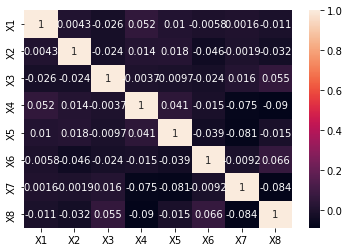

In [9]:
sns.heatmap(data.corr(), annot = True);

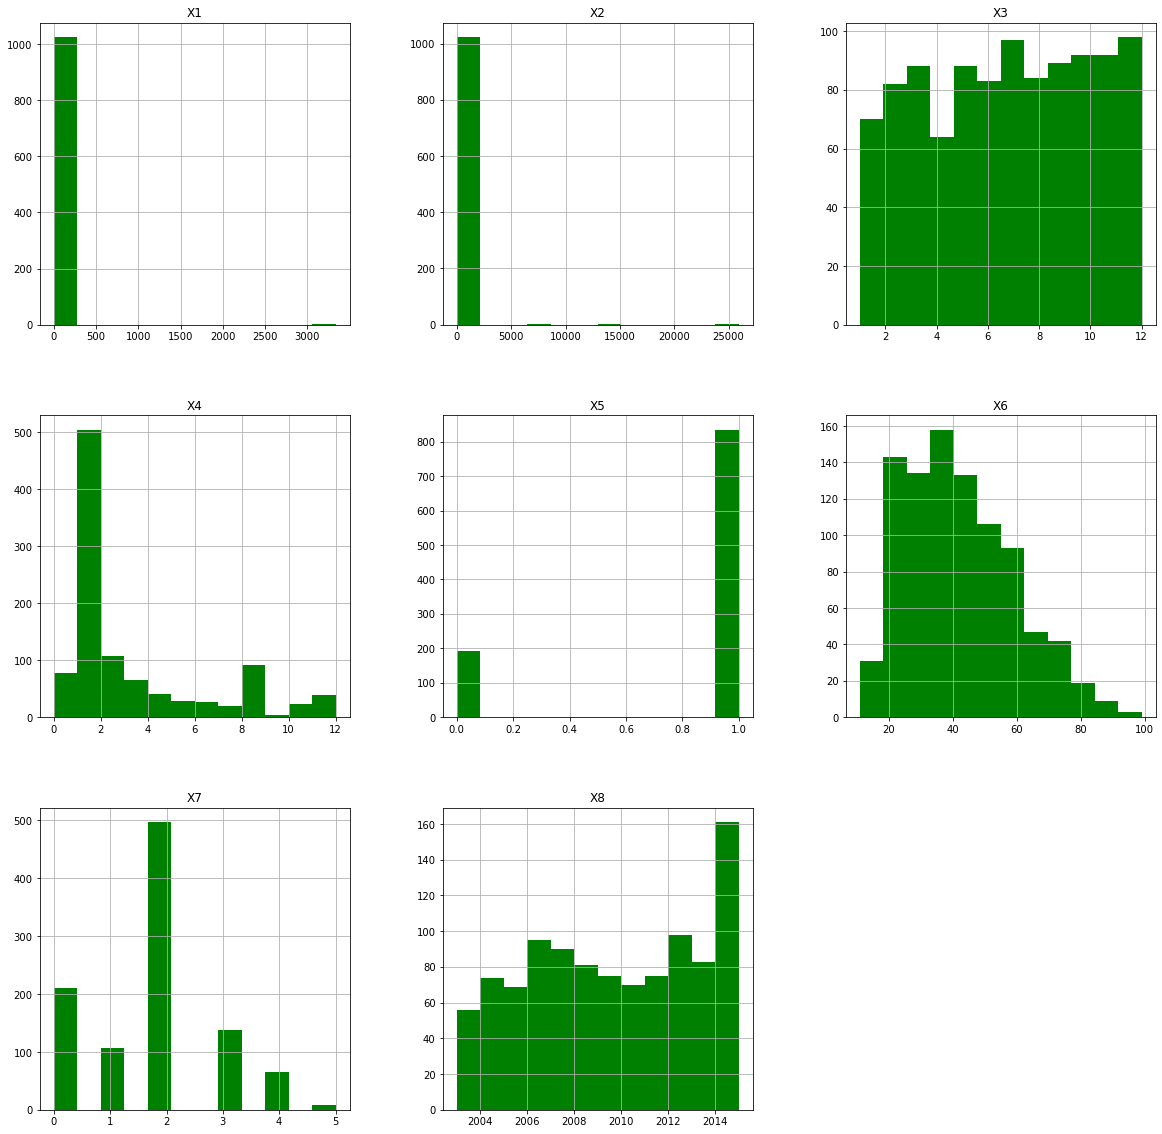

In [10]:
data.hist(bins = 12, figsize = (20,20), color = 'g');


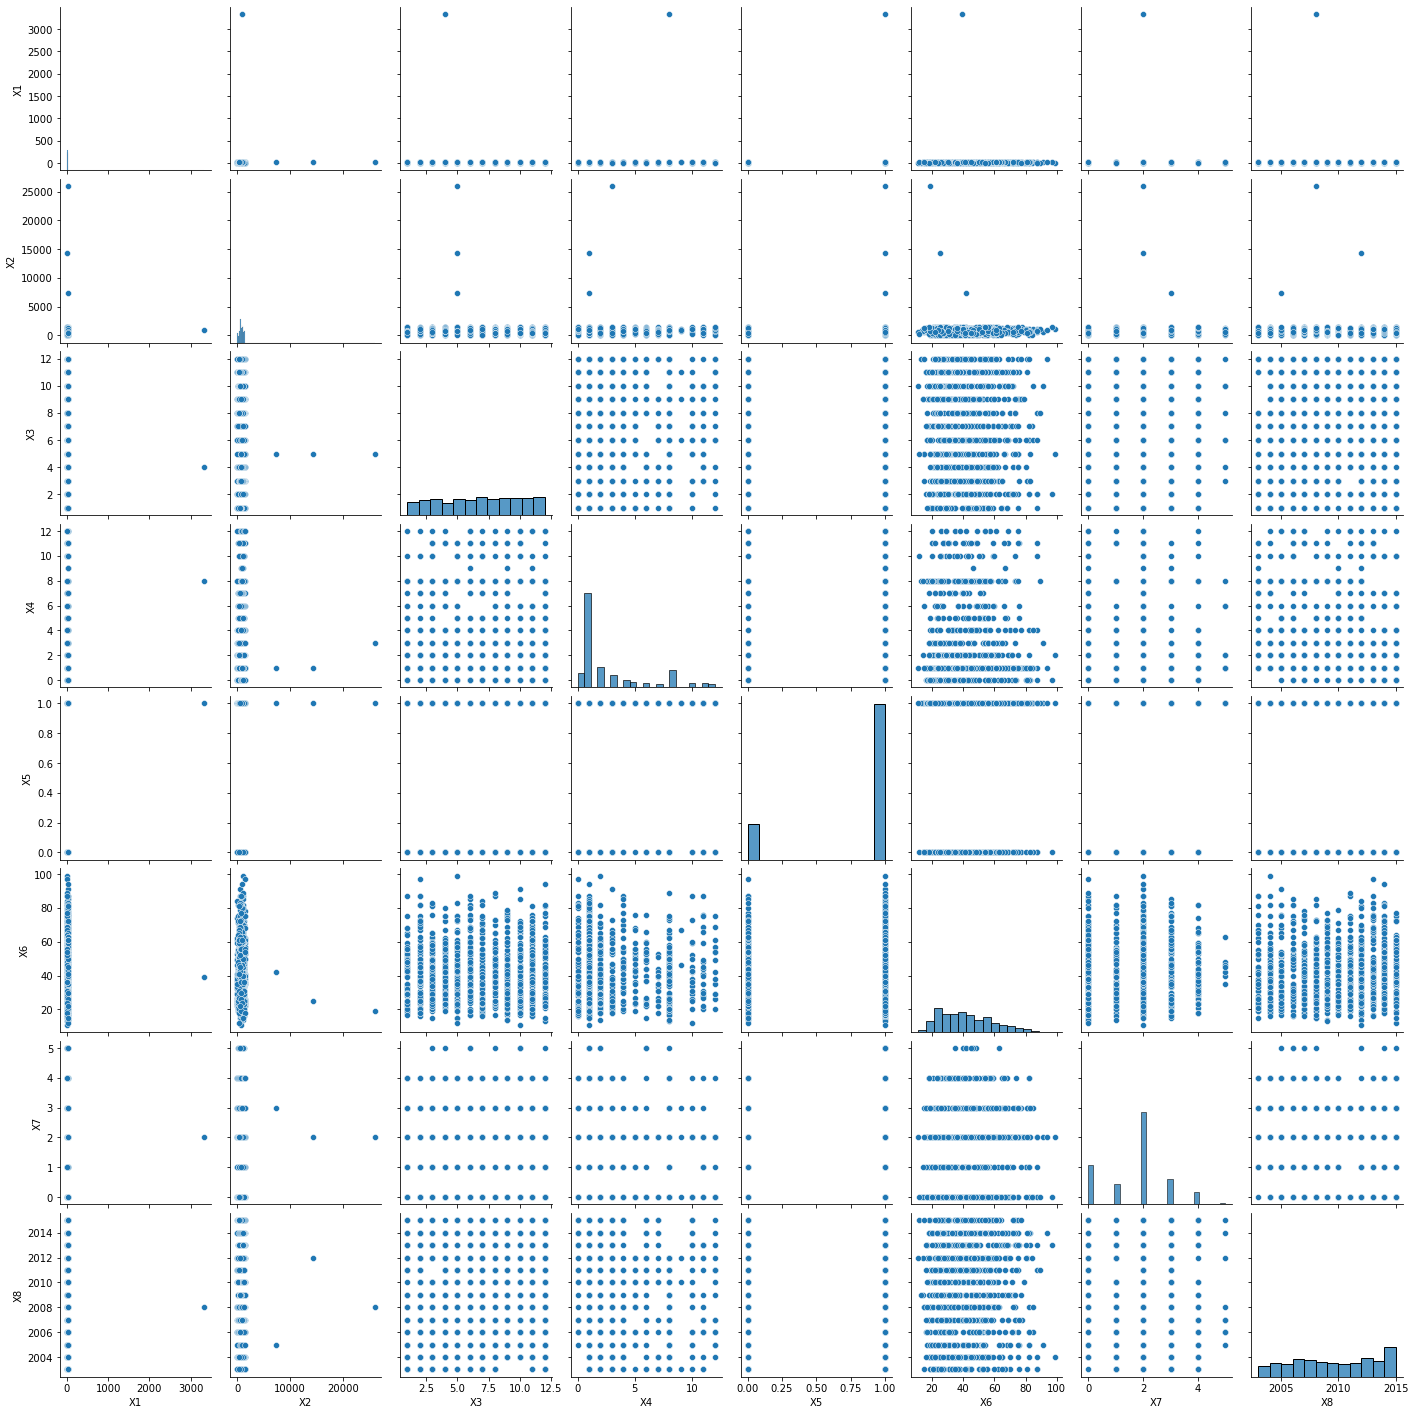

In [11]:
sns.pairplot(data);

# Etapa 4: Tratamento da base de dados

In [12]:
data_sem_na = data.dropna()

In [13]:
#selecionei todas as variaveis menos x6 pois tentarei prever x6
selected_features = ['X1','X2','X3','X4','X5','X7','X8']
X = data_sem_na[selected_features]
#falta construir filtro para o dataset 
#se x6 for NA retire a linha do dataset
# dps coloca um drop NA e oq sobrar é y
y = data_sem_na['X6']

In [14]:
data

,X1,X2,X3,X4,X5,X6,X7,X8
0,10,725,1,4,0,87.0,2,2003
1,19,230,1,1,1,23.0,3,2003
2,25,800,1,3,1,45.0,2,2003
3,25,1290,1,1,1,34.0,2,2003
4,30,175,1,1,1,45.0,2,2003
...,...,...,...,...,...,...,...,...
1022,10,1010,12,1,1,24.0,2,2015
1023,17,1200,12,1,0,15.0,2,2015
1024,21,960,12,1,1,61.0,3,2015
1025,26,540,12,7,1,22.0,2,2015


In [15]:
data_sem_na 

,X1,X2,X3,X4,X5,X6,X7,X8
0,10,725,1,4,0,87.0,2,2003
1,19,230,1,1,1,23.0,3,2003
2,25,800,1,3,1,45.0,2,2003
3,25,1290,1,1,1,34.0,2,2003
4,30,175,1,1,1,45.0,2,2003
...,...,...,...,...,...,...,...,...
1022,10,1010,12,1,1,24.0,2,2015
1023,17,1200,12,1,0,15.0,2,2015
1024,21,960,12,1,1,61.0,3,2015
1025,26,540,12,7,1,22.0,2,2015


In [16]:
X.head()

,X1,X2,X3,X4,X5,X7,X8
0,10,725,1,4,0,2,2003
1,19,230,1,1,1,3,2003
2,25,800,1,3,1,2,2003
3,25,1290,1,1,1,2,2003
4,30,175,1,1,1,2,2003


In [17]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled

array([[0.00270108, 0.02797068, 0.        , ..., 0.        , 0.4       ,
        0.        ],
       [0.00540216, 0.00887346, 0.        , ..., 1.        , 0.6       ,
        0.        ],
       [0.00720288, 0.0308642 , 0.        , ..., 1.        , 0.4       ,
        0.        ],
       ...,
       [0.0060024 , 0.03703704, 1.        , ..., 1.        , 0.6       ,
        1.        ],
       [0.007503  , 0.02083333, 1.        , ..., 1.        , 0.4       ,
        1.        ],
       [0.00870348, 0.0162037 , 1.        , ..., 0.        , 0.4       ,
        1.        ]])

In [19]:
X_scaled.shape

(918, 7)

# tentativas de regressão com mlp regressor

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [21]:
model = MLPRegressor(activation='relu', max_iter=10000,solver ='adam',hidden_layer_sizes = (100))
model.fit(x_train, y_train)

MLPRegressor(hidden_layer_sizes=100, max_iter=10000)

In [22]:
y_pred = model.predict(x_test)

In [23]:
y_pred

array([36.64530381, 42.06200339, 42.30621096, 42.5131755 , 40.18088354,
       41.95549208, 41.61374576, 37.12425183, 41.74385447, 41.86800715,
       43.00519098, 41.38512096, 41.75028479, 43.48550146, 43.81635467,
       41.00698335, 42.27610578, 40.05544965, 42.11954151, 40.93739052,
       41.94578311, 38.75391979, 42.87220136, 41.86572157, 45.22234795,
       43.40732487, 43.29178691, 41.32918022, 37.95181433, 38.17825852,
       39.04534452, 43.35436883, 42.64529405, 38.52727797, 43.61503629,
       46.00603541, 44.06280766, 45.91115687, 44.29346427, 50.09192752,
       43.0568456 , 42.86824509, 44.38713302, 41.56180349, 39.11781023,
       41.97396765, 40.69264599, 42.28373497, 37.3125433 , 45.9339094 ,
       37.12431711, 42.50900371, 45.45873608, 41.40977416, 43.22306241,
       42.63198378, 38.86579484, 40.18241262, 43.07243117, 42.12493557,
       39.80738696, 38.85314017, 43.66666301, 41.92871716, 38.56183084,
       43.50752786, 42.78320475, 41.1706005 , 41.04309915, 42.76

In [24]:
mean_absolute_error(y_test,y_pred)

12.754677986763435

In [25]:
r2_score(y_test,y_pred)

0.012666565611647251

In [26]:
model.score(x_test,y_test)

0.012666565611647251

In [27]:
y_test

400    39.0
951    67.0
313    32.0
424    43.0
992    63.0
       ... 
787    43.0
739    59.0
673    40.0
957    33.0
534    42.0
Name: X6, Length: 184, dtype: float64

In [28]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print(f"Train MSE : {0.5*np.mean((y_train-y_train_pred)**2)}")
print(f"Test MSE : {0.5*np.mean((y_test-y_test_pred)**2)}")

Train MSE : 144.01009347751332
Test MSE : 128.01243414038186


# Tentativa Knn

In [29]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_train, y_train)
  
    training_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [30]:
# melhor score no test está horripilante
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.5136239782016349, 0.03804347826086957]
3 : [0.35967302452316074, 0.03804347826086957]
4 : [0.2847411444141689, 0.02717391304347826]
5 : [0.24114441416893734, 0.016304347826086956]
6 : [0.2220708446866485, 0.010869565217391304]
7 : [0.21525885558583105, 0.021739130434782608]
8 : [0.20435967302452315, 0.010869565217391304]
9 : [0.19209809264305178, 0.021739130434782608]
10 : [0.18528610354223432, 0.03260869565217391]
11 : [0.167574931880109, 0.03804347826086957]
12 : [0.16348773841961853, 0.04891304347826087]
13 : [0.16076294277929154, 0.043478260869565216]
14 : [0.15258855585831063, 0.03804347826086957]
15 : [0.14032697547683923, 0.03260869565217391]
16 : [0.13215258855585832, 0.03260869565217391]
17 : [0.13215258855585832, 0.03804347826086957]
18 : [0.12397820163487738, 0.03804347826086957]
19 : [0.11852861035422343, 0.03804347826086957]
20 : [0.11171662125340599, 0.021739130434782608]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


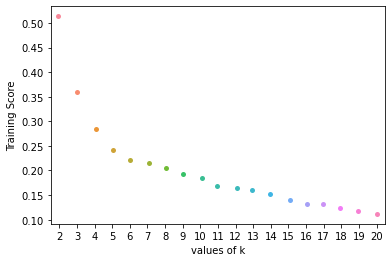

In [31]:
#o melhor numero de k é 2
ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score')  
  
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


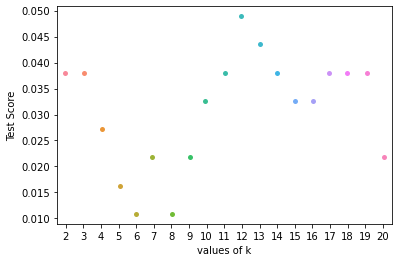

In [32]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()

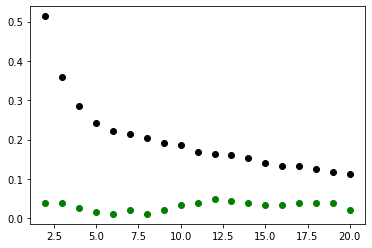

In [33]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()
# maior valor em 2

# Tentativa pca

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
x_standard = StandardScaler().fit_transform(X)

In [36]:
#usando apenas 2 componentes
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x_standard)

In [37]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [38]:
principalDf

,principal component 1,principal component 2
0,1.260815,2.103244
1,1.118047,1.603920
2,1.732651,0.891300
3,1.477960,1.030287
4,1.226815,0.981427
...,...,...
913,-1.662261,-0.902303
914,-2.194215,0.373546
915,-1.733549,-0.290712
916,-0.614783,-1.281437


# Usando média para preencher

In [39]:
mediana_x6 = data.X6.median()

In [40]:
data.fillna(mediana_x6, inplace = True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1027 non-null   int64  
 1   X2      1027 non-null   int64  
 2   X3      1027 non-null   int64  
 3   X4      1027 non-null   int64  
 4   X5      1027 non-null   int64  
 5   X6      1027 non-null   float64
 6   X7      1027 non-null   int64  
 7   X8      1027 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 64.3 KB
